# Linear Regression

* Linear regression is a supervised machine learning algorithm

* Its predicted output is continuous

* There are two main types:

    * Simple regression \begin{equation} p = w x + b \end{equation}
    * Multivariable regression \begin{equation} f(x,y,z) = w_1 x + w_2 y + w_3 z \end{equation}

where,<br> 
    <b>$p$</b> and <b>$f(x,y,z)$</b> are the predictions <br>
    <b>$w$</b> represents the weight <br>
    <b>$b$</b> is the bias term <br>
    <b>$x, y$</b> and <b>$z$</b> are the inputs
    
The model will try to learn the optimum values for weight and bias terms to get the line of best fit.

<img style="float: left;" width="400" src="Linregr.png">

In [68]:
# simple linear regression model
def simple_LinR(x, w, b):
    return w*x + b

## Cost Function

* A cost function is required to optimize the weights

* Mean Squared Error (MSE) is used as cost function

* Goal is to improve the accuracy of model by minimizing the MSE 

* For simple linear regression, MSE can be calculated as:

\begin{equation} MSE =  \frac{1}{N} \sum_{i=1}^{N} (y_i - (wx_i + b))^2 \end{equation}

where,<br> 
    <b><i>$N$</i></b> shows the total number of observations <br>
    <b>$\frac{1}{N} \sum_{i=1}^{N}$</b> is the mean <br>
    <b>$y_i$</b> is the actual value <br>
    <b>$(wx_i + b)$</b> is the prediction

In [69]:
def cost_function(x, y, w, b):
    samples = len(x)
    total_error = 0.0
    for i in range(samples):
        total_error += (y[i] - (w*x[i] + b))**2
    return total_error / samples

## Gradient Descent

* Gradient descent is used to calculate the gradient of cost function

* Cost function:

\begin{equation} f(w,b) =  \frac{1}{N} \sum_{i=1}^{N} (y_i - (wx_i + b))^2 \end{equation}

* Gradient can be calculated as:

\begin{equation}
f'(w,b) =
   \begin{bmatrix}
     \frac{df}{dw}\\
     \frac{df}{db}\\
    \end{bmatrix}
=
   \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (wx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (wx_i + b)) \\
    \end{bmatrix}
\end{equation}

In [70]:
def update_weights(x, y, w, b, a):
    # a is the learning rate
    w_der = 0
    b_der = 0
    samples = len(x)

    for i in range(samples):
        # Calculating partial derivatives
        # -2x(y - (wx + b))
        w_der += -2*x[i] * (y[i] - (w*x[i] + b))

        # -2(y - (wx + b))
        b_der += -2*(y[i] - (w*x[i] + b))

    # subtracting because the derivatives point in the direction of steepest ascent
    w -= (w_der / samples) * a
    b -= (b_der / samples) * a

    return w, b

## Training

* The process of iteratively improving the prediction

* Data is accessed multiple times to update weight and bias values

* Training is complete when an acceptable error threshold reaches, or further iterations fail to reduce the cost

In [71]:
def train(x, y, w, b, a, iters):
    cost_record = []

    for i in range(iters):
        w,b = update_weights(x, y, w, b, a)

        #Calculate cost for auditing purposes
        cost = cost_function(x, y, w, b)
        cost_record.append(cost)
        #pred = simple_LinR(x,w,b)

        # Log Progress
        if i % 10 == 0:
            print("iter= "+str(i) + "     weight= "+str(w) + "     bias= "+str(b) + "      cost= "+str(cost))
            #plt.plot(x, pred)

    return w, b, cost_record

## Execution

Discalimer: The following example has been designed to show how the algorithm works.
Solving the problem is not the real concern here at the moment

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_diabetes

In [73]:
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Description of Dataset

* Total samples: 442
* Given below are the predictive features:
    1. age: age in years
    2. sex
    3. bmi: body mass index
    4. bp: average blood pressure
    5. s1: tc, total serum cholesterol
    6. s2: ldl, low-density lipoproteins
    7. s3: hdl, high-density lipoproteins
    8. s4: tch, total cholesterol / HDL
    9. s5: ltg, possibly log of serum triglycerides level
    10. s6: glu, blood sugar level

Text(0, 0.5, 'target')

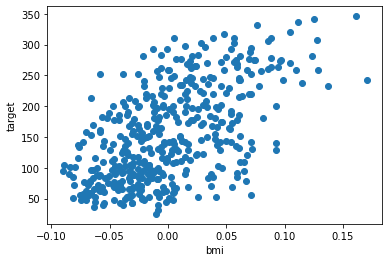

In [74]:
feature = 'bmi'
X = df_diabetes['bmi']
Y = df_diabetes['target']
plt.scatter(X, Y , marker='o')
plt.xlabel(feature)
plt.ylabel('target')

In [75]:
w = 0.45 #0.02
b = 0.6 #1
a = 0.3
iters = 100
w, b, cost_record = train(X, Y, w, b, a, iters)

iter= 0     weight= 1.7382152855892408     bias= 91.52009049773761      cost= 9596.407699893012
iter= 10     weight= 14.52457978989278     bias= 152.12712838790836      cost= 5867.963369497439
iter= 20     weight= 27.138430178970918     bias= 152.13348349644463      cost= 5814.962112624866
iter= 30     weight= 39.58209401981436     bias= 152.13348416282608      cost= 5763.38143691602
iter= 40     weight= 51.8578674757917     bias= 152.13348416289597      cost= 5713.183228583347
iter= 50     weight= 63.96801573034815     bias= 152.13348416289597      cost= 5664.3304346797995
iter= 60     weight= 75.91477340498795     bias= 152.13348416289597      cost= 5616.786995352916
iter= 70     weight= 87.70034497161718     bias= 152.133484162896      cost= 5570.517817227867
iter= 80     weight= 99.32690515932329     bias= 152.133484162896      cost= 5525.48874750393
iter= 90     weight= 110.79659935566629     bias= 152.13348416289602      cost= 5481.66654874508


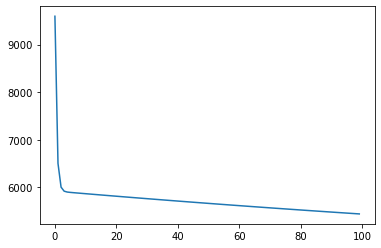

In [76]:
plt.plot(cost_record)

## Multivariable Regression

\begin{equation} f(x,y,z) = w_1 x + w_2 y + w_3 z \end{equation}

### Cost Function

\begin{equation} MSE =  \frac{1}{2N} \sum_{i=1}^{N} (y_i - (w_1x_i + w_2y_i + w_3z_i))^2 \end{equation}

### Gradient Descent

\begin{align}
f'(w_1) = -x_1(y - (w_1x_i + w_2y_i + w_3z_i)) \\
f'(w_2) = -x_2(y - (w_1x_i + w_2y_i + w_3z_i)) \\
f'(w_3) = -x_3(y - (w_1x_i + w_2y_i + w_3z_i))
\end{align}

## Gradient Descent (detailed steps for simple linear regression)

Since cost function is MSE:
\begin{equation} f(w,b) =  \frac{1}{N} \sum_{i=1}^{N} (y_i - (wx_i + b))^2 \end{equation}

let 
\begin{equation} (y_i - (wx_i + b))^2 = A(B(w,b)) \end{equation}

splitting the derivative into outer and inner function
\begin{equation} A(x) = x^2 \end{equation}
\begin{equation} \frac{df}{dx} = A'(x) = 2x \end{equation}

and
\begin{equation} B(w,b) = y_i - (wx_i + b) = y_i - wx_i - b \end{equation}
\begin{equation} \frac{dx}{dw} = B'(w) = 0 - x_i - 0 = -x_i \end{equation}
\begin{equation} \frac{dx}{db} = B'(b) = 0 - 0 - 1 = -1 \end{equation}

by <i>chain rule</i>

\begin{equation} \frac{df}{dw} = \frac{df}{dx} \frac{dx}{dw} \end{equation}
\begin{equation} \frac{df}{db} = \frac{df}{dx} \frac{dx}{db} \end{equation}

substituting the respective values to get the following derivatives

\begin{equation}
f'(w,b) =
   \begin{bmatrix}
     \frac{df}{dw}\\
     \frac{df}{db}\\
    \end{bmatrix}
=
   \begin{bmatrix}
     \frac{1}{N} \sum -x_i . 2(y_i - (wx_i + b)) \\
     \frac{1}{N} \sum -1 . 2(y_i - (wx_i + b)) \\
    \end{bmatrix}
\end{equation}

\begin{equation} =
   \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (wx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (wx_i + b)) \\
    \end{bmatrix}
\end{equation}

## References

[1] https://en.wikipedia.org/wiki/Linear_regression

[2] Efron, B., Hastie, T., Johnstone, I. and Tibshirani, R., 2004. Least angle regression. Annals of statistics, 32(2), pp.407-499.

[3] http://machinelearningmastery.com/simple-linear-regression-tutorial-for-machine-learning